In [ ]:
#CNN model without diffusion
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Model
from keras.layers import (
    Input,
    Activation,
    Conv3D,
    Conv3DTranspose,
    MaxPooling3D,
    UpSampling3D,
    concatenate,
    ReLU, Dropout,BatchNormalization
)

from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.compat.v1.logging import INFO, set_verbosity

set_verbosity(INFO)

import tensorflow.python.keras.backend as K
K.set_image_data_format("channels_first")

In [ ]:
#Definning random seed
np.random.seed(1000)

In [ ]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
HOME_DIR = "/content/drive/MyDrive/pddca"
DATA_DIR = HOME_DIR

def load_case(imgfile, labelfile):
    # load the image and label file, get the image content and return a numpy array for each
    image = np.array(np.load(imgfile))
    label = np.array(np.load(labelfile))

    return image, label

img=[]
msk=[]
for dir in os.listdir(DATA_DIR):
  #print(dir)
  imfile=DATA_DIR+"/"+str(dir)+"/img_crp_v2.npy"
  lbfile=DATA_DIR+"/"+str(dir)+"/structures/mask.npy"
  #print(os.path.isfile(lbfile),lbfile)
  if(os.path.isfile(lbfile)):
    im,ms=load_case(imfile,lbfile)
    #print(im,ms)
    img.append(im)
    msk.append(ms)



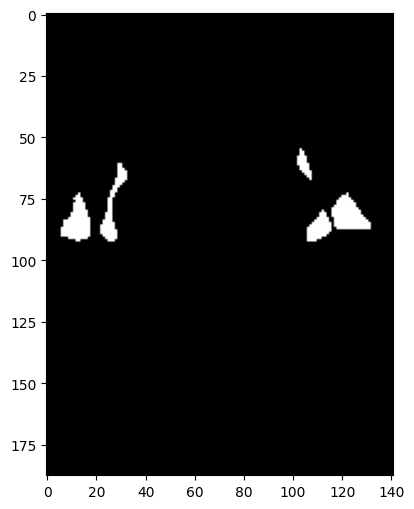

In [ ]:
plt.figure(figsize=(14,6))
im1=msk[0]
imt=im1[36,:,:]
plt.imshow(imt,cmap='gray')

In [ ]:
# from patchify import patchify
# import tensorflow as tf


# img_patches = patchify(img[0], (32, 64, 64), step=64)
# mask_patches  = patchify(msk[0], (32, 64, 64), step=64)
# input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
# input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

# train_img = np.stack((input_img,)*3, axis=-1)
# train_mask = np.stack((input_mask,)*3, axis=-1)
# # train_mask = to_categorical(input_mask, num_classes=3)

# #train_img=np.expand_dims(train_img,axis=4)
# #train_mask = np.expand_dims(input_mask, axis=4)


# train_img=tf.cast(train_img, tf.float32)
# train_mask=tf.cast(train_mask, tf.float32)



# img_patches1 = patchify(img[1], (32, 64, 64), step=64)
# mask_patches1  = patchify(msk[1], (32, 64, 64), step=64)
# input_img1 = np.reshape(img_patches1, (-1, img_patches1.shape[3], img_patches1.shape[4], img_patches1.shape[5]))
# input_mask1 = np.reshape(mask_patches1, (-1, mask_patches1.shape[3], mask_patches1.shape[4], mask_patches1.shape[5]))

# train_img1 = np.stack((input_img1,)*3, axis=-1)
# train_mask1 = np.stack((input_mask1,)*3, axis=-1)
# #train_mask1 = to_categorical(input_mask1, num_classes=3)
# #train_img=np.expand_dims(train_img,axis=4)
# #train_mask = np.expand_dims(input_mask, axis=4)

# train_img1=tf.cast(train_img1, tf.float32)
# train_mask1=tf.cast(train_mask1, tf.float32)
# #tf.cast(train_mask_cat1, tf.float32)


# tri=np.concatenate((train_img,train_img1),axis=0)
# trm=np.concatenate((train_mask,train_mask1),axis=0)
# print(tri.shape)
# print(trm.shape)

In [ ]:
# for i in range(2,len(img)):
#   img_patches = patchify(img[i], (32, 64, 64), step=64)
#   mask_patches  = patchify(msk[i], (32, 64, 64), step=64)
#   input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
#   input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

#   train_img = np.stack((input_img,)*3, axis=-1)
#   train_mask = np.stack((input_mask,)*3, axis=-1)
#   #train_mask = to_categorical(input_mask, num_classes=3)
#   #train_img=np.expand_dims(train_img,axis=4)
#   #train_mask = np.expand_dims(input_mask, axis=4)



#   #train_mask_cat = to_categorical(input_mask, num_classes=3)
#   train_img=tf.cast(train_img, tf.float32)
#   train_mask=tf.cast(train_mask, tf.float32)

#   tri=np.concatenate((tri,train_img),axis=0)
#   trm=np.concatenate((trm,train_mask),axis=0)


# print(tri.shape)
# print(trm.shape)

In [ ]:
# plt.figure(figsize=(14,6))
# im1=trm[40]
# plt.imshow(im1[31,:,:])

In [ ]:
!pip install elasticdeform

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.6/91.6 kB 11.1 MB/s eta 0:00:00


In [ ]:
# from scipy import ndimage
# from scipy.ndimage import affine_transform
# import elasticdeform
# import multiprocessing as mp


# # theta = np.random.uniform(0,0)
# # img_data = tf.keras.preprocessing.image.apply_affine_transform(tri, theta=theta, channel_axis=3)

# # print(tri.shape)
# # Flip the image along the z-axis
# # flipped_data = np.flip(tri, axis=2)

# # Rotate the array by 90 degrees along the x-axis
# # arr_rotated = np.rot90(tri, k=1, axes=(2, 3))

# def flip3D(X, y):
#   choice = np.random.randint(3)
#   if choice == 0:
#     X_flip, y_flip = X[::-1, :, :, :], y[::-1, :, :]
#   if choice == 1: # flip on y
#     X_flip, y_flip = X[:, ::-1, :, :], y[:, ::-1, :]
#   if choice == 2: # flip on z
#     X_flip, y_flip = X[:, :, ::-1, :], y[:, :, ::-1]

#   return X_flip, y_flip


# def rotation_zoom3D(X, y):
#     alpha, beta, gamma = np.random.random_sample(3)*np.pi/2
#     Rx = np.array([[1, 0, 0],
#                    [0, np.cos(alpha), -np.sin(alpha)],
#                    [0, np.sin(alpha), np.cos(alpha)]])

#     Ry = np.array([[np.cos(beta), 0, np.sin(beta)],
#                    [0, 1, 0],
#                    [-np.sin(beta), 0, np.cos(beta)]])

#     Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
#                    [np.sin(gamma), np.cos(gamma), 0],
#                    [0, 0, 1]])

#     R_rot = np.dot(np.dot(Rx, Ry), Rz)

#     a, b = 0.8, 1.2
#     alpha, beta, gamma = (b-a)*np.random.random_sample(3) + a
#     R_scale = np.array([[alpha, 0, 0],
#                    [0, beta, 0],
#                    [0, 0, gamma]])

#     R = np.dot(R_rot, R_scale)
#     X_rot = np.empty_like(X)
#     for channel in range(X.shape[-1]):
#         X_rot[:,:,:,channel] = affine_transform(X[:,:,:,channel], R, offset=0, order=1, mode='constant')
#     y_rot = affine_transform(y, R, offset=0, order=0, mode='constant')

#     return X_rot, y_rot

# def rotation(X,y):
#   Xn=np.rot90(X, k=1, axes=(2, 3))
#   yn=np.rot90(y, k=1, axes=(2, 3))

#   return Xn,yn

# def brightness(X, y):
#     """
#     Changing the brighness of a image using power-law gamma transformation.
#     Gain and gamma are chosen randomly for each image channel.

#     Gain chosen between [0.8 - 1.2]
#     Gamma chosen between [0.8 - 1.2]

#     new_im = gain * im^gamma
#     """

#     X_new = np.zeros(X.shape)
#     for c in range(X.shape[-1]):
#         im = X[:,:,:,c]
#         gain, gamma = (1.2 - 0.8) * np.random.random_sample(2,) + 0.8
#         im_new = np.sign(im)*gain*(np.abs(im)**gamma)
#         X_new[:,:,:,c] = im_new

#     return X_new, y

# def elastic(X, y):
#     """
#     Elastic deformation on a image and its target
#     """

#     [Xel, yel] = elasticdeform.deform_random_grid([X, y], sigma=2, axis=[(0, 1, 2), (0, 1, 2)], order=[1, 0], mode='constant')

#     return Xel, yel

# def random_decisions(N):
#     """
#     Generate N random decisions for augmentation
#     N should be equal to the batch size
#     """

#     decisions = np.zeros((N, 4)) # 4 is number of aug techniques to combine (patch extraction excluded)
#     for n in range(N):
#         decisions[n] = np.random.randint(2, size=4)

#     return decisions

# def combine_aug(X, y, do):
#     """
#     Combine randomly the different augmentation techniques written above
#     """
#     Xnew, ynew = X, y

#     # make sure to use at least 25% of original images
#     if np.random.random_sample()>0.75:
#         return Xnew, ynew
#     else:
#         if do[0] == 1:
#             Xnew, ynew = flip3D(Xnew, ynew)

#         if do[1] == 1:
#             Xnew, ynew = brightness(Xnew, ynew)

#         if do[2] == 1:
#             Xnew, ynew = rotation(Xnew, ynew)

#         if do[3] == 1:
#             Xnew, ynew = elastic(Xnew, ynew)

#         return Xnew, ynew

# def aug_batch(Xb, Yb):
#     """
#     Generate a augmented image batch
#     """
#     batch_size = 8
#     newXb, newYb = np.empty_like(Xb), np.empty_like(Yb)

#     decisions = random_decisions(batch_size)

#     inputs = [(X, y, do) for X, y, do in zip(Xb, Yb, decisions)]
#     pool = mp.Pool(processes=8)
#     multi_result = pool.starmap(combine_aug, inputs)
#     print(multi_result[0][1].shape)
#     pool.close()

#     for i in range(batch_size):
#         newXb[i], newYb[i] = multi_result[i][0], multi_result[i][1]

#     return newXb, newYb

# def data_aug(X, y):
#   X_aug, y_aug = aug_batch(X, y)

#   return X_aug, to_categorical(y_aug, 3)



In [ ]:
# from scipy import ndimage
# from scipy.ndimage import affine_transform
# import elasticdeform
# import multiprocessing as mp


# # theta = np.random.uniform(0,0)
# # img_data = tf.keras.preprocessing.image.apply_affine_transform(tri, theta=theta, channel_axis=3)

# # print(tri.shape)
# # Flip the image along the z-axis
# # flipped_data = np.flip(tri, axis=2)

# # Rotate the array by 90 degrees along the x-axis
# # arr_rotated = np.rot90(tri, k=1, axes=(2, 3))

# def flip3D(X, y):
#     choice = np.random.randint(3)
#     if choice == 0:
#         X_flip, y_flip = X[::-1, :, :], y[::-1, :, :]
#     if choice == 1: # flip on y
#         X_flip, y_flip = X[:, ::-1, :], y[:, ::-1, :]
#     if choice == 2: # flip on z
#         X_flip, y_flip = X[:, :, ::-1], y[:, :, ::-1]

#     return X_flip, y_flip


# def rotation_zoom3D(X, y):
#     alpha, beta, gamma = np.random.random_sample(3)*np.pi/2
#     Rx = np.array([[1, 0, 0],
#                    [0, np.cos(alpha), -np.sin(alpha)],
#                    [0, np.sin(alpha), np.cos(alpha)]])

#     Ry = np.array([[np.cos(beta), 0, np.sin(beta)],
#                    [0, 1, 0],
#                    [-np.sin(beta), 0, np.cos(beta)]])

#     Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
#                    [np.sin(gamma), np.cos(gamma), 0],
#                    [0, 0, 1]])

#     R_rot = np.dot(np.dot(Rx, Ry), Rz)

#     a, b = 0.8, 1.2
#     alpha, beta, gamma = (b-a)*np.random.random_sample(3) + a
#     R_scale = np.array([[alpha, 0, 0],
#                    [0, beta, 0],
#                    [0, 0, gamma]])

#     R = np.dot(R_rot, R_scale)
#     X_rot = np.empty_like(X)
#     for channel in range(X.shape[-1]):
#         X_rot[:,:,:,channel] = affine_transform(X[:,:,:,channel], R, offset=0, order=1, mode='constant')
#     y_rot = affine_transform(y, R, offset=0, order=0, mode='constant')

#     return X_rot, y_rot

# def rotation(X,y):
#     Xn=np.rot90(X, k=1, axes=(1, 2))
#     yn=np.rot90(y, k=1, axes=(1, 2))

#     return Xn,yn

# def brightness(X, y):
#     """
#     Changing the brighness of a image using power-law gamma transformation.
#     Gain and gamma are chosen randomly for each image channel.

#     Gain chosen between [0.8 - 1.2]
#     Gamma chosen between [0.8 - 1.2]

#     new_im = gain * im^gamma
#     """

#     X_new = np.zeros(X.shape)
#     for c in range(X.shape[-1]):
#         im = X[:,:,:,c]
#         gain, gamma = (1.2 - 0.8) * np.random.random_sample(2,) + 0.8
#         im_new = np.sign(im)*gain*(np.abs(im)**gamma)
#         X_new[:,:,:,c] = im_new

#     return X_new, y

# def elastic(X, y):
#     """
#     Elastic deformation on a image and its target
#     """

#     [Xel, yel] = elasticdeform.deform_random_grid([X, y], sigma=2, axis=[(0, 1, 2), (0, 1, 2)], order=[1, 0], mode='constant')

#     return Xel, yel

# def random_decisions(N):
#     """
#     Generate N random decisions for augmentation
#     N should be equal to the batch size
#     """

#     decisions = np.zeros((N, 3)) # 4 is number of aug techniques to combine (patch extraction excluded)
#     for n in range(N):
#         decisions[n] = np.random.randint(2, size=3)

#     return decisions

# def combine_aug(X, y, do):
#     """
#     Combine randomly the different augmentation techniques written above
#     """
#     Xnew, ynew = X, y

#     # make sure to use at least 25% of original images
#     if np.random.random_sample()>0.75:
#         return Xnew, ynew
#     else:
#         if do[0] == 1:
#             Xnew, ynew = flip3D(Xnew, ynew)

# #         if do[1] == 1:
# #             Xnew, ynew = brightness(Xnew, ynew)

#         if do[1] == 1:
#             Xnew, ynew = rotation(Xnew, ynew)

#         if do[2] == 1:
#             Xnew, ynew = elastic(Xnew, ynew)

#         return Xnew, ynew

# def aug_batch(Xb, Yb):
#     """
#     Generate a augmented image batch
#     """
#     batch_size = 8
#     #newXb, newYb = np.empty_like(Xb, dtype=object), np.empty_like(Yb, dtype=object)
#     newXb, newYb = Xb, Yb

#     decisions = random_decisions(batch_size)

#     inputs = [(X, y, do) for X, y, do in zip(Xb, Yb, decisions)]
#     pool = mp.Pool(processes=8)
#     multi_result = pool.starmap(combine_aug, inputs)
#     #print(multi_result[0][0].shape)
#     pool.close()

#     for i in range(batch_size):
#         newXb[i], newYb[i] = multi_result[i][0], multi_result[i][1]

#     return newXb, newYb

# def data_aug(X, y):
#     X_f, y_f = flip3D(X,y)
#     X_r, y_r = rotation(X,y)
#     X_e, y_e = elastic(X,y)
#     #X_aug, y_aug = aug_batch(X, y)
#     X_aug = X_f + X_r + X_e
#     y_aug = y_f + y_r + y_e
#     return X_aug, y_aug


In [ ]:
# imc,msc=img,msk

In [ ]:
# print(len(img))
# print(len(msk))

In [ ]:
# imgn=imc
# mskn=msc
# for i in range(len(imc)):
#   imf,msf=flip3D(imc[i],msc[i])
#   ime,mse=elastic(imc[i],msc[i])
#   imr,msr=rotation(imc[i],msc[i])
#   imgn.append(imf)
#   imgn.append(ime)
#   imgn.append(imr)

#   mskn.append(msf)
#   mskn.append(mse)
#   mskn.append(msr)


In [ ]:
# print(len(imgn))
# print(len(mskn))

In [ ]:
# print(len(img))
# print(len(msk))

In [ ]:
# print(len(imc))
# print(len(msc))

In [ ]:
# for i in range(len(img)):
#   imd,msd=elastic(img[i],msk[i])
#   imgn.append(imd)
#   mskn.append(msd)

In [ ]:
# print(len(imgn))
# print(len(mskn))

In [ ]:
# for i in range(len(img)):
#   imd,msd=rotation(img[i],msk[i])
#   imgn.append(imd)
#   mskn.append(msd)

In [ ]:
# print(len(img))
# print(len(mskn))

In [ ]:
from scipy import ndimage
from scipy.ndimage import affine_transform
import elasticdeform
import multiprocessing as mp


# theta = np.random.uniform(0,0)
# img_data = tf.keras.preprocessing.image.apply_affine_transform(tri, theta=theta, channel_axis=3)

# print(tri.shape)
# Flip the image along the z-axis
# flipped_data = np.flip(tri, axis=2)

# Rotate the array by 90 degrees along the x-axis
# arr_rotated = np.rot90(tri, k=1, axes=(2, 3))

def flip3D(X, y):
    choice = np.random.randint(3)
    if choice == 0:
        X_flip, y_flip = X[::-1, :, :], y[::-1, :, :]
    if choice == 1: # flip on y
        X_flip, y_flip = X[:, ::-1, :], y[:, ::-1, :]
    if choice == 2: # flip on z
        X_flip, y_flip = X[:, :, ::-1], y[:, :, ::-1]

    return X_flip, y_flip


def rotation_zoom3D(X, y):
    alpha, beta, gamma = np.random.random_sample(3)*np.pi/2
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(alpha), -np.sin(alpha)],
                   [0, np.sin(alpha), np.cos(alpha)]])

    Ry = np.array([[np.cos(beta), 0, np.sin(beta)],
                   [0, 1, 0],
                   [-np.sin(beta), 0, np.cos(beta)]])

    Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                   [np.sin(gamma), np.cos(gamma), 0],
                   [0, 0, 1]])

    R_rot = np.dot(np.dot(Rx, Ry), Rz)

    a, b = 0.8, 1.2
    alpha, beta, gamma = (b-a)*np.random.random_sample(3) + a
    R_scale = np.array([[alpha, 0, 0],
                   [0, beta, 0],
                   [0, 0, gamma]])

    R = np.dot(R_rot, R_scale)
    X_rot = np.empty_like(X)
    for channel in range(X.shape[-1]):
        X_rot[:,:,:,channel] = affine_transform(X[:,:,:,channel], R, offset=0, order=1, mode='constant')
    y_rot = affine_transform(y, R, offset=0, order=0, mode='constant')

    return X_rot, y_rot

def rotation(X,y):
    Xn=np.rot90(X, k=1, axes=(1, 2))
    yn=np.rot90(y, k=1, axes=(1, 2))

    return Xn,yn

def brightness(X, y):
    """
    Changing the brighness of a image using power-law gamma transformation.
    Gain and gamma are chosen randomly for each image channel.

    Gain chosen between [0.8 - 1.2]
    Gamma chosen between [0.8 - 1.2]

    new_im = gain * im^gamma
    """

    X_new = np.zeros(X.shape)
    for c in range(X.shape[-1]):
        im = X[:,:,:,c]
        gain, gamma = (1.2 - 0.8) * np.random.random_sample(2,) + 0.8
        im_new = np.sign(im)*gain*(np.abs(im)**gamma)
        X_new[:,:,:,c] = im_new

    return X_new, y

def elastic(X, y):
    """
    Elastic deformation on a image and its target
    """

    [Xel, yel] = elasticdeform.deform_random_grid([X, y], sigma=2, axis=[(0, 1, 2), (0, 1, 2)], order=[1, 0], mode='constant')

    return Xel, yel

def random_decisions(N):
    """
    Generate N random decisions for augmentation
    N should be equal to the batch size
    """

    decisions = np.zeros((N, 3)) # 4 is number of aug techniques to combine (patch extraction excluded)
    for n in range(N):
        decisions[n] = np.random.randint(2, size=3)

    return decisions

def combine_aug(X, y, do):
    """
    Combine randomly the different augmentation techniques written above
    """
    Xnew, ynew = X, y

    # make sure to use at least 25% of original images
    if np.random.random_sample()>0.75:
        return Xnew, ynew
    else:
        if do[0] == 1:
            Xnew, ynew = flip3D(Xnew, ynew)

#         if do[1] == 1:
#             Xnew, ynew = brightness(Xnew, ynew)

        if do[1] == 1:
            Xnew, ynew = rotation(Xnew, ynew)

        if do[2] == 1:
            Xnew, ynew = elastic(Xnew, ynew)

        return Xnew, ynew

def aug_batch(Xb, Yb):
    """
    Generate a augmented image batch
    """
    batch_size = 8
    #newXb, newYb = np.empty_like(Xb, dtype=object), np.empty_like(Yb, dtype=object)
    newXb, newYb = Xb, Yb

    decisions = random_decisions(batch_size)

    inputs = [(X, y, do) for X, y, do in zip(Xb, Yb, decisions)]
    pool = mp.Pool(processes=8)
    multi_result = pool.starmap(combine_aug, inputs)
    #print(multi_result[0][0].shape)
    pool.close()

    for i in range(batch_size):
        newXb[i], newYb[i] = multi_result[i][0], multi_result[i][1]

    return newXb, newYb

def data_aug(X, y):
    X_aug, y_aug = aug_batch(X, y)

    return X_aug, y_aug


In [ ]:
imn,msn=data_aug(img,msk)
imgn=img+imn
mskn=msk+msn

In [ ]:
#anisotropic diffusion
import warnings
from PIL import Image
import matplotlib
import skimage.io as io
import skimage.filters as flt
%matplotlib inline
import scipy.ndimage.filters as flt


def anisodiff3(stack,niter=1,kappa=50,gamma=0.1,step=(1.,1.,1.),option=1,ploton=False):

    # ...you could always diffuse each color channel independently if you
    # really want
    if stack.ndim == 4:
        warnings.warn("Only grayscale stacks allowed, converting to 3D matrix")
        stack = stack.mean(3)

    # initialize output array
    stack = stack.astype('float32')
    stackout = stack.copy()

    # initialize some internal variables
    deltaS = np.zeros_like(stackout)
    deltaE = deltaS.copy()
    deltaD = deltaS.copy()
    NS = deltaS.copy()
    EW = deltaS.copy()
    UD = deltaS.copy()
    gS = np.ones_like(stackout)
    gE = gS.copy()
    gD = gS.copy()

    # create the plot figure, if requested
    if ploton:
        import pylab as pl
        from time import sleep

        showplane = stack.shape[0]//2

        fig = pl.figure(figsize=(20,5.5),num="Anisotropic diffusion")
        ax1,ax2 = fig.add_subplot(1,2,1),fig.add_subplot(1,2,2)

        ax1.imshow(stack[showplane,...].squeeze(),interpolation='nearest')
        ih = ax2.imshow(stackout[showplane,...].squeeze(),interpolation='nearest',animated=True)
        ax1.set_title("Original stack (Z = %i)" %showplane)
        ax2.set_title("Iteration 0")

        fig.canvas.draw()

    for ii in range(niter):

        # calculate the diffs
        deltaD[:-1,: ,:  ] = np.diff(stackout,axis=0)
        deltaS[:  ,:-1,: ] = np.diff(stackout,axis=1)
        deltaE[:  ,: ,:-1] = np.diff(stackout,axis=2)

        # conduction gradients (only need to compute one per dim!)
        if option == 1:
            gD = np.exp(-(deltaD/kappa)**2.)/step[0]
            gS = np.exp(-(deltaS/kappa)**2.)/step[1]
            gE = np.exp(-(deltaE/kappa)**2.)/step[2]
        elif option == 2:
            gD = 1./(1.+(deltaD/kappa)**2.)/step[0]
            gS = 1./(1.+(deltaS/kappa)**2.)/step[1]
            gE = 1./(1.+(deltaE/kappa)**2.)/step[2]

        # update matrices
        D = gD*deltaD
        E = gE*deltaE
        S = gS*deltaS

        # subtract a copy that has been shifted 'Up/North/West' by one pixel
        UD[:] = D
        NS[:] = S
        EW[:] = E
        UD[1:,: ,: ] -= D[:-1,:  ,:  ]
        NS[: ,1:,: ] -= S[:  ,:-1,:  ]
        EW[: ,: ,1:] -= E[:  ,:  ,:-1]

        # update the image
        stackout += gamma*(UD+NS+EW)

        if ploton:
            iterstring = "Iteration %i" %(ii+1)
            ih.set_data(stackout[showplane,...].squeeze())
            ax2.set_title(iterstring)
            fig.canvas.draw()
            # sleep(0.01)

    return stackout

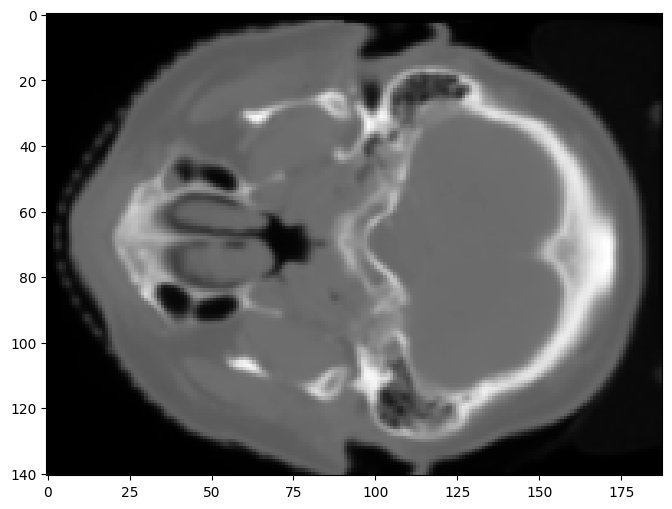

In [ ]:
dimg=[]
dmsk=mskn
for i in range(len(imgn)):
    aimg=anisodiff3(imgn[i])
    dimg.append(aimg)
    # amsk=anisodiff3(msk[i])
    # dmsk.append(amsk)

plt.figure(figsize=(14,6))
im1=dimg[0]
plt.imshow(im1[36,:,:],cmap='gray')
# for i in range(len(dimg)):
#   print(dimg[i].shape)

In [ ]:
# def extract_3d_patches(image, patch_size):
#     patch_shape = tuple(patch_size)
#     image_shape = image.shape
#     num_patches = [int(image_shape[i] / patch_shape[i]) for i in range(3)]

#     patches = []
#     for i in range(num_patches[0]):
#         for j in range(num_patches[1]):
#             for k in range(num_patches[2]):
#                 start = (i * patch_shape[0], j * patch_shape[1], k * patch_shape[2])
#                 end = (start[0] + patch_shape[0], start[1] + patch_shape[1], start[2] + patch_shape[2])
#                 patch = image[start[0]:end[0], start[1]:end[1], start[2]:end[2]]
#                 patches.append(patch)

#     return np.array(patches)

# # # Example usage
# # #image = np.random.rand(128, 128, 128)  # Replace with your 3D image data
# # # patch_size = (32, 64, 64)

# # # patches = extract_3d_patches(image, patch_size)

In [ ]:
# img_patches = extract_3d_patches(img[0], (32, 64, 64))
# mask_patches  = extract_3d_patches(msk[0], (32, 64, 64))
# img_patches = np.stack((img_patches,)*3, axis=-1)
# mask_patches = np.stack((mask_patches,)*3, axis=-1)
# img_patches=tf.cast(img_patches, tf.float32)
# mask_patches=tf.cast(mask_patches, tf.float32)

In [ ]:
# img_patches1 = extract_3d_patches(img[1], (32, 64, 64))
# mask_patches1  = extract_3d_patches(msk[1], (32, 64, 64))
# img_patches1 = np.stack((img_patches1,)*3, axis=-1)
# mask_patches1 = np.stack((mask_patches1,)*3, axis=-1)
# img_patches1=tf.cast(img_patches1, tf.float32)
# mask_patches1=tf.cast(mask_patches1, tf.float32)

In [ ]:
# tri=np.concatenate((img_patches,img_patches1),axis=0)
# trm=np.concatenate((mask_patches,mask_patches1),axis=0)
# print(tri.shape)
# print(trm.shape)

(20, 32, 64, 64, 3)
(20, 32, 64, 64, 3)


In [ ]:
# for i in range(2,len(imgn)):
#   img_patches = extract_3d_patches(img[0], (32, 64, 64))
#   mask_patches  = extract_3d_patches(msk[0], (32, 64, 64))
#   img_patches = np.stack((img_patches,)*3, axis=-1)
#   mask_patches = np.stack((mask_patches,)*3, axis=-1)
#   img_patches=tf.cast(img_patches, tf.float32)
#   mask_patches=tf.cast(mask_patches, tf.float32)

#   tri=np.concatenate((tri,img_patches),axis=0)
#   trm=np.concatenate((trm,mask_patches),axis=0)


# print(tri.shape)
# print(trm.shape)

(724, 32, 64, 64, 3)
(724, 32, 64, 64, 3)


In [ ]:
from patchify import patchify
import tensorflow as tf


img_patches = patchify(dimg[0], (32, 64, 64), step=64)
mask_patches  = patchify(dmsk[0], (32, 64, 64), step=64)
input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

train_img = np.stack((input_img,)*3, axis=-1)
train_mask = np.stack((input_mask,)*3, axis=-1)
# train_mask = to_categorical(input_mask, num_classes=3)

#train_img=np.expand_dims(train_img,axis=4)
#train_mask = np.expand_dims(input_mask, axis=4)


train_img=tf.cast(train_img, tf.float32)
train_mask=tf.cast(train_mask, tf.float32)



img_patches1 = patchify(dimg[1], (32, 64, 64), step=64)
mask_patches1  = patchify(dmsk[1], (32, 64, 64), step=64)
input_img1 = np.reshape(img_patches1, (-1, img_patches1.shape[3], img_patches1.shape[4], img_patches1.shape[5]))
input_mask1 = np.reshape(mask_patches1, (-1, mask_patches1.shape[3], mask_patches1.shape[4], mask_patches1.shape[5]))

train_img1 = np.stack((input_img1,)*3, axis=-1)
train_mask1 = np.stack((input_mask1,)*3, axis=-1)
#train_mask1 = to_categorical(input_mask1, num_classes=3)
#train_img=np.expand_dims(train_img,axis=4)
#train_mask = np.expand_dims(input_mask, axis=4)

train_img1=tf.cast(train_img1, tf.float32)
train_mask1=tf.cast(train_mask1, tf.float32)
#tf.cast(train_mask_cat1, tf.float32)


tri=np.concatenate((train_img,train_img1),axis=0)
trm=np.concatenate((train_mask,train_mask1),axis=0)
print(tri.shape)
print(trm.shape)

(10, 32, 64, 64, 3)
(10, 32, 64, 64, 3)


In [ ]:
for i in range(2,len(imgn)):
  img_patches = patchify(dimg[i], (32, 64, 64), step=64)
  mask_patches  = patchify(dmsk[i], (32, 64, 64), step=64)
  input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
  input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

  train_img = np.stack((input_img,)*3, axis=-1)
  train_mask = np.stack((input_mask,)*3, axis=-1)
  #train_mask = to_categorical(input_mask, num_classes=3)
  #train_img=np.expand_dims(train_img,axis=4)
  #train_mask = np.expand_dims(input_mask, axis=4)



  #train_mask_cat = to_categorical(input_mask, num_classes=3)
  train_img=tf.cast(train_img, tf.float32)
  train_mask=tf.cast(train_mask, tf.float32)

  tri=np.concatenate((tri,train_img),axis=0)
  trm=np.concatenate((trm,train_mask),axis=0)


print(tri.shape)
print(trm.shape)

(692, 32, 64, 64, 3)
(692, 32, 64, 64, 3)


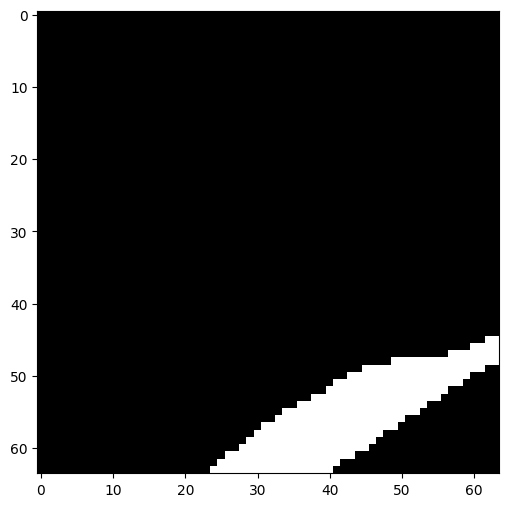

In [ ]:
plt.figure(figsize=(14,6))
im1=trm[25]
plt.imshow(im1[15,:,:])

In [ ]:
# imt = im1[31,:,:]
# cv2.imwrite('test2.jpg', imt)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
acc=keras.metrics.Accuracy


In [ ]:
# Loss Function and coefficients to be used during training:
def dice_coefficient(y_true, y_pred):
    # tf.cast(y_true, tf.float32)
    # tf.cast(y_pred, tf.float32)
    smoothing_factor = 1
    flat_y_true = K.flatten(y_true)
    flat_y_pred = K.flatten(y_pred)
    return (2. * K.sum(flat_y_true * flat_y_pred) + smoothing_factor) / (K.sum(flat_y_true) + K.sum(flat_y_pred) + smoothing_factor)

def dice_coefficient_loss(y_true, y_pred):
    # print(y_true.shape)
    # print(y_pred.shape)
    return 1 - dice_coefficient(y_true, y_pred)

def iou_3d(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def iou_coef(y_true, y_pred):
  smooth=1
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

# def dice_coeff(y_true, y_pred,smooth=1):
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
#     return score

# Computing Precision
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision


# Computing Sensitivity
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import add

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, concatenate, BatchNormalization

# def conv_block(input_tensor, num_filters):
#     x = Conv3D(num_filters, kernel_size=(3, 3, 3), activation='relu', padding='same')(input_tensor)
#     x = BatchNormalization()(x)
#     x = Conv3D(num_filters, kernel_size=(3, 3, 3), activation='relu', padding='same')(x)
#     x = BatchNormalization()(x)
#     return x

# def res_block(input_tensor, num_filters):
#     x = conv_block(input_tensor, num_filters)
#     x = concatenate([x, input_tensor])
#     return x

# def encoder_block(input_tensor, num_filters):
#     x = conv_block(input_tensor, num_filters)
#     residual = res_block(x, num_filters)
#     x = MaxPooling3D((2, 2, 2))(residual)
#     return x, residual

# def decoder_block(input_tensor, residual, num_filters):
#     x = UpSampling3D((2, 2, 2))(input_tensor)
#     x = concatenate([x, residual])
#     x = conv_block(x, num_filters)
#     return x

# def unet_3d_resnet(input_shape=(32, 64, 64, 3), num_filters=[16, 32, 32, 64, 128]):
#     inputs = Input(input_shape)
#     x = inputs

#     # Encoder
#     encoder_residuals = []
#     for f in num_filters:
#         x, residual = encoder_block(x, f)
#         encoder_residuals.append(residual)

#     # Middle
#     x = conv_block(x, num_filters[-1])

#     # Decoder
#     for i, f in enumerate(reversed(num_filters[:-1])):
#         residual = encoder_residuals[-i-1]
#         x = decoder_block(x, residual, f)

#     x = UpSampling3D((2, 2, 2))(x)
#     # Output
#     outputs = Conv3D(3, (1, 1, 1), activation='sigmoid')(x)

#     model = tf.keras.models.Model(inputs=[inputs], outputs=[outputs])

#     return model

In [ ]:


def conv_block(input_tensor, num_filters):
    x = Conv3D(num_filters, kernel_size=(3, 3, 3), activation='relu', padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Conv3D(num_filters, kernel_size=(3, 3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    return x

def res_block(input_tensor, num_filters):
    x = conv_block(input_tensor, num_filters)
    x = concatenate([x, input_tensor])
    return x

def encoder_block(input_tensor, num_filters):
    x = conv_block(input_tensor, num_filters)
    residual = res_block(x, num_filters)
    x = MaxPooling3D((2, 2, 2))(residual)
    return x, residual

def decoder_block(input_tensor, residual, num_filters):
    x = UpSampling3D((2, 2, 2))(input_tensor)
    x = concatenate([x, residual])
    x = conv_block(x, num_filters)
    return x

def unet_3d_resnet(input_shape=(32, 64, 64, 3), num_filters=[16, 32, 32, 64, 128]):
    inputs = Input(input_shape)
    x = inputs

    # Encoder
    encoder_residuals = []
    for f in num_filters:
        x, residual = encoder_block(x, f)
        encoder_residuals.append(residual)

    # Middle
    x = conv_block(x, num_filters[-1])

    # Decoder
    for i, f in enumerate(reversed(num_filters[:-1])):
        residual = encoder_residuals[-i-1]
        x = decoder_block(x, residual, f)

    x = UpSampling3D((2, 2, 2))(x)
    # Output
    outputs = Conv3D(3, (1, 1, 1), activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=[inputs], outputs=[outputs])

    return model

In [ ]:
iou=keras.metrics.IoU
model=unet_3d_resnet()
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss=dice_coefficient_loss,
              metrics=[dice_coefficient,iou_coef])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 64, 64,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv3d (Conv3D)                (None, 32, 64, 64,   1312        ['input_1[0][0]']                
                                16)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 64, 64,   64         ['conv3d[0][0]']                 
 alization)                     16)                                                           

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
from sklearn.model_selection import train_test_split
#X_tr, X_val, y_tr, y_val = train_test_split(tri, trm, test_size = 0.10,random_state=9)
X_train, X_test, y_train, y_test = train_test_split(tri, trm, test_size = 0.1, random_state=19)

In [ ]:
# del(imgn)
# del(mskn)

In [ ]:
history = model.fit(X_train,y_train,epochs=150,batch_size=8,validation_split=0.1)

Epoch 1/150
70/70 [==============================] - 37s 307ms/step - loss: 0.8994 - dice_coefficient: 0.1006 - iou_coef: 0.0469 - val_loss: 0.9232 - val_dice_coefficient: 0.0764 - val_iou_coef: 0.0383
Epoch 2/150
70/70 [==============================] - 18s 251ms/step - loss: 0.8691 - dice_coefficient: 0.1310 - iou_coef: 0.0567 - val_loss: 0.9494 - val_dice_coefficient: 0.0510 - val_iou_coef: 0.0211
Epoch 3/150
70/70 [==============================] - 18s 253ms/step - loss: 0.8401 - dice_coefficient: 0.1599 - iou_coef: 0.0661 - val_loss: 0.9263 - val_dice_coefficient: 0.0734 - val_iou_coef: 0.0384
Epoch 4/150
70/70 [==============================] - 18s 254ms/step - loss: 0.8021 - dice_coefficient: 0.1982 - iou_coef: 0.0793 - val_loss: 0.8440 - val_dice_coefficient: 0.1553 - val_iou_coef: 0.0695
Epoch 5/150
70/70 [==============================] - 19s 267ms/step - loss: 0.7411 - dice_coefficient: 0.2587 - iou_coef: 0.0993 - val_loss: 0.7537 - val_dice_coefficient: 0.2459 - val_iou_coe

In [ ]:
# import tensorflow as tf

# # Create a tf.data.Dataset object for the training data
# train_dataset = tf.data.Dataset.from_tensor_slices((Xtr, ytr))
# train_dataset = train_dataset.shuffle(buffer_size=len(Xtr)).batch(32)

# # Create a tf.data.Dataset object for the validation data
# val_dataset = tf.data.Dataset.from_tensor_slices((Xval, yval))
# val_dataset = val_dataset.batch(32)


# # Train the model using the tf.data.Dataset objects
# model.fit(train_dataset, epochs=10, validation_data=val_dataset)


In [ ]:
# history = model.fit(CustomDataGenerator(Xtr, ytr, batch_size=32), validation_data=CustomDataGenerator(Xval, yval, batch_size=32),
#     epochs=100,batch_size=16)

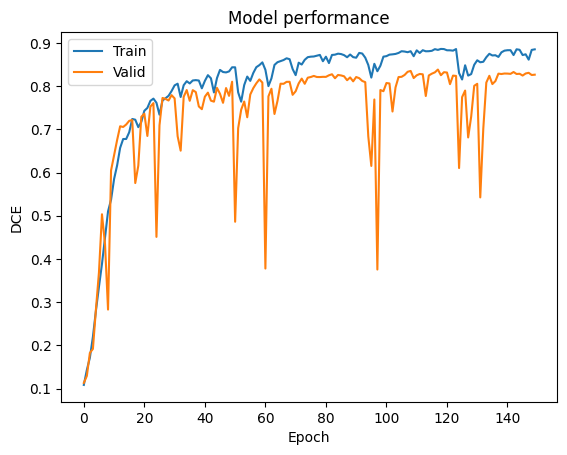

In [ ]:
plt.plot(history.history['dice_coefficient'])
plt.plot(history.history['val_dice_coefficient'])
plt.title('Model performance')
plt.ylabel('DCE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()
# plt.savefig('dce_plot.png')
# plt.close()

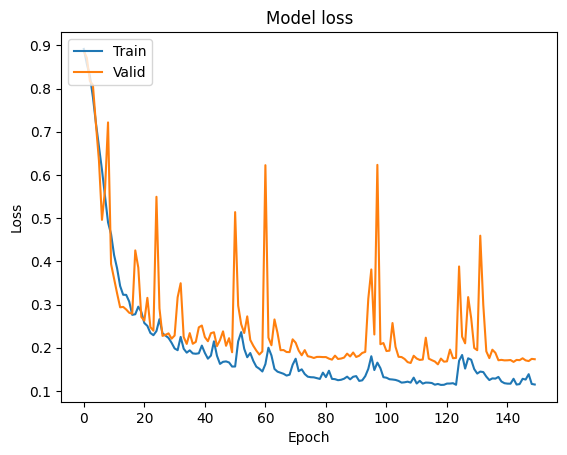

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

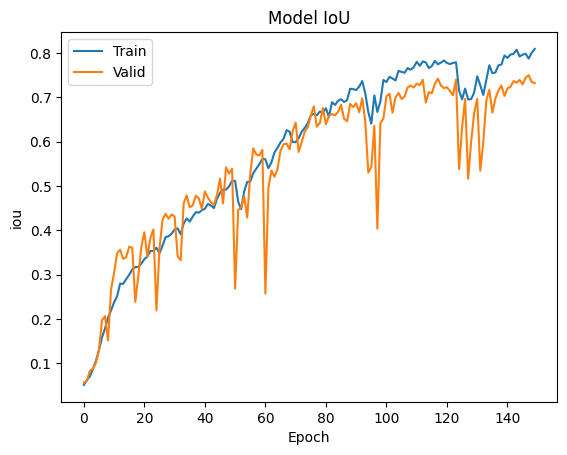

In [ ]:
plt.plot(history.history['iou_coef'])
plt.plot(history.history['val_iou_coef'])
plt.title('Model IoU')
plt.ylabel('iou')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [ ]:
pred=model.predict(X_test)
print(pred.shape)

3/3 [==============================] - 5s 481ms/step
(70, 32, 64, 64, 3)


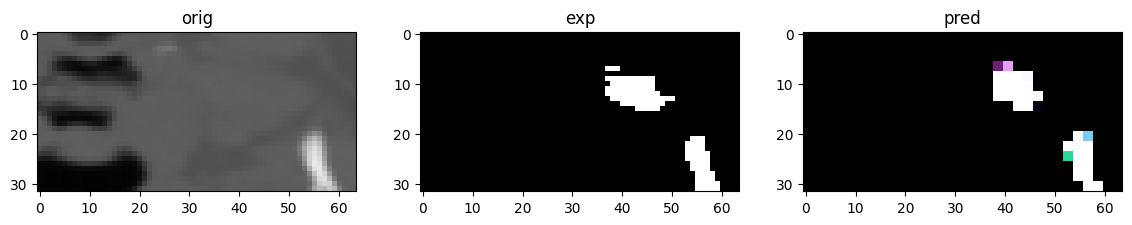

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(131)
plt.title('orig')
plt.imshow(X_test[5][:,25,:],cmap='gray')


plt.subplot(132)
plt.title('exp')
plt.imshow(y_test[5][:,25,:],cmap='gray')

plt.subplot(133)
plt.title('pred')
plt.imshow(pred[5][:,25,:],cmap='gray')

In [ ]:
# from PIL import Image
# yt=y_test[5][:,25,:]

# scaled_image = ((yt - np.min(yt)) / (np.max(yt) - np.min(yt))) * 255
# scaled_image = scaled_image.astype(np.uint8)


# image = Image.fromarray(scaled_image)

# # Save the slice as an image file
# image.save('slice_image.jpg')

In [ ]:
res=model.evaluate(X_test,y_test,batch_size=8)
res

9/9 [==============================] - 1s 89ms/step - loss: 0.1495 - dice_coefficient: 0.8515 - iou_coef: 0.8022 - acc: 0.6213


[0.14950215816497803,
 0.8514737486839294,
 0.8021644353866577,
 0.6213352680206299]

In [ ]:
model.save('/content/drive/MyDrive/PDDCA_Work/Res_Unet/unet_resnet_augmodel_d_88_83_85.h5')

In [ ]:
threshold = 0.5
predicted_masks_binary = (pred > threshold).astype(np.uint8)

# Flatten the predicted masks and ground truth masks
num_samples, height, width, depth = predicted_masks_binary.shape[:4]
predicted_masks_flat = predicted_masks_binary.reshape(num_samples, -1)
ground_truth_masks_flat = y_test.reshape(num_samples, -1)

# Compute the confusion matrix
cm = confusion_matrix(ground_truth_masks_flat.flatten(), predicted_masks_flat.flatten())

# Calculate TP, FP, and FN from the confusion matrix
TP = cm[1, 1]  # True positives
FP = cm[0, 1]  # False positives
FN = cm[1, 0]  # False negatives
TN = cm[0, 0]  # True negatives

accuracy = (TP + TN) / (TP + FN + FP + TN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)


print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)

In [ ]:
# predicted_masks_flat = predicted_masks_flat.astype('float32')
# ground_truth_masks_flat = ground_truth_masks_flat.astype('float32')
# precision(ground_truth_masks_flat, predicted_masks_flat)